In [1]:
import backproject
import id_generation
import numpy as np
import glob
import cv2
import torch
import matplotlib.pyplot as plt

In [2]:
path_to_traj = "/Users/A200254469/Desktop/tum/2024ws/advancedDL4CV/segment/nice-slam/Datasets/Replica/room0/traj.txt"
T_wc = np.loadtxt(path_to_traj).reshape(-1, 4, 4)

In [3]:
directory = "/Users/A200254469/Desktop/tum/2024ws/advancedDL4CV/segment/nice-slam/Datasets/Replica/room0/results"

In [4]:
def readDepth(filepath):
    depth=cv2.imread(filepath, cv2.IMREAD_UNCHANGED)
    depth_data = depth.astype(np.float32) / 6553.5
    depth_data = torch.from_numpy(depth_data)
    return depth_data

In [5]:
# color_paths = sorted(glob.glob('/home/julius/Project/nice-slam/Datasets/Replica/room0/results/frame*.jpg'))
depth_paths = sorted(
    glob.glob(
        "/Users/A200254469/Desktop/tum/2024ws/advancedDL4CV/segment/nice-slam/Datasets/Replica/room0/results/depth*.png"
    )
)
seg_paths = sorted(
    glob.glob(
        "/Users/A200254469/Desktop/tum/2024ws/advancedDL4CV/segment/nice-slam/segmentation/data/room0/seg*.npy"
    )
)

In [6]:
K = np.array([[600, 0.0, 599.5], [0.0, 600, 339.5], [0.0, 0.0, 1.0]])

In [8]:
#store_path = "/Users/A200254469/Desktop/tum/2024ws/advancedDL4CV/segment/nice-slam/segmentation/our_gen/room0"
seg_path = "/Users/A200254469/Desktop/tum/2024ws/advancedDL4CV/segment/nice-slam/segmentation/data/room0_small"

In [9]:
first = np.load(
    "/Users/A200254469/Desktop/tum/2024ws/advancedDL4CV/segment/nice-slam/segmentation/data/room0_small/seg000000.npy"
)
segmentations = []
segmentations.append(first)
np.unique(first)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71], dtype=int32)

In [10]:
id_counter = len(np.unique(first))
id_counter

72

In [11]:
i = 5
every_frame= 5
ids_curr = np.load(seg_paths[int(i/every_frame)])
ids_curr

array([[1, 1, 1, ..., 4, 4, 4],
       [1, 1, 1, ..., 4, 4, 4],
       [1, 1, 1, ..., 4, 4, 4],
       ...,
       [1, 1, 1, ..., 5, 5, 5],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

In [12]:
map = id_generation.create_complete_mapping_of_current_frame(ids_curr, 5, [0], T_wc, K, depth_paths, segmentations, id_counter, points_per_instance = 5)[0]

In [13]:
ids = id_generation.update_current_frame(ids_curr, map)

In [14]:
np.unique(ids_curr), np.unique(first)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86], dtype=int32),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71], dtype=int32))

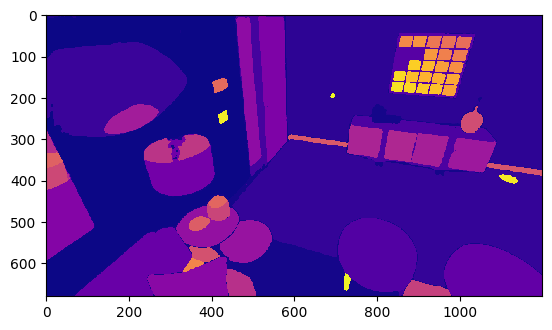

In [15]:
plt.imshow(first,cmap='plasma',interpolation='nearest')

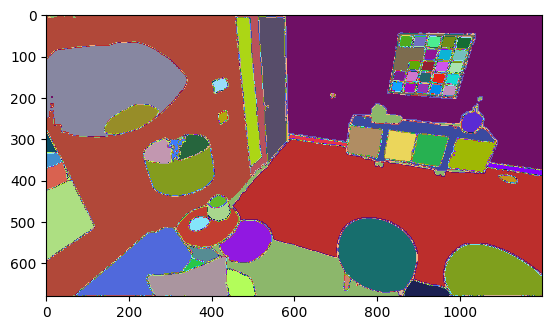

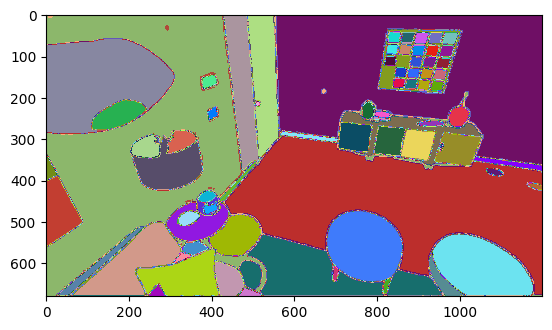

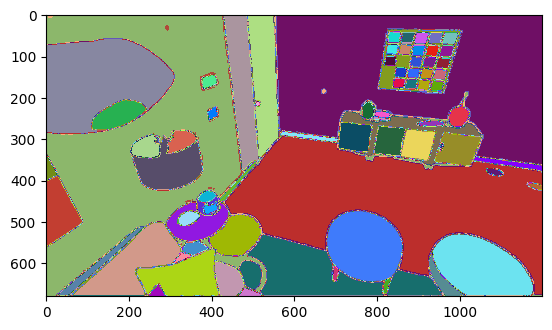

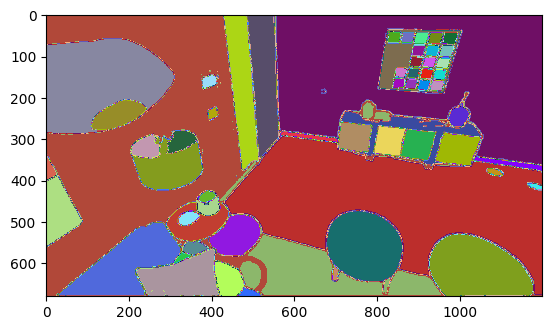

In [16]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from vis import visualizerForIds

visualizerForId = visualizerForIds()
visualizerForId.visualizer(first)
visualizerForId.visualizer(ids_curr)
visualizerForId.visualizer(ids_curr)

visualizerForId.visualizer(ids)

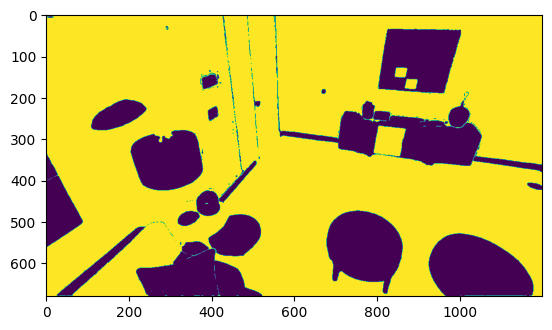

In [34]:
plt.imshow((ids-ids_curr == 0))

In [35]:
ids[600:620, 600:610]

array([[10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]], dtype=int32)

In [36]:
ids_curr[600:620, 600:610]

array([[10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]], dtype=int32)